# Sleep Quality Prediction Using Decision Tree


In [1]:
import pandas as pd
df=pd.read_csv("sleep_quality.csv")
df.head()

,Caffeine_Intake,Screen_Time_Hours,Exercise,Stress_Level,Sleep_Hours,Sleep_Quality
0,High,2,No,Low,7,Average
1,Low,1,No,High,4,Poor
2,High,2,No,Low,4,Poor
3,High,5,Yes,High,4,Poor
4,Low,2,Yes,Medium,4,Poor


In [2]:
inputs= df.drop('Sleep_Quality', axis='columns')           # separates features by removing the target column 
target=df['Sleep_Quality']                                 # stores the target/output variable

In [3]:
inputs.head()

,Caffeine_Intake,Screen_Time_Hours,Exercise,Stress_Level,Sleep_Hours
0,High,2,No,Low,7
1,Low,1,No,High,4
2,High,2,No,Low,4
3,High,5,Yes,High,4
4,Low,2,Yes,Medium,4


In [7]:
target.head()

0    Average
1       Poor
2       Poor
3       Poor
4       Poor
Name: Sleep_Quality, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder     # imports LabelEncoder to convert categorical data into numeric form  

In [10]:
le_caffeine = LabelEncoder()
le_exercise = LabelEncoder()
le_stress = LabelEncoder()

In [71]:
# Encodes categorical columns ('Caffeine_Intake', 'Exercise', 'Sleep_Hours') into numeric values and displays the updated DataFrame  
inputs['Caffeine_Intake_n']= le_caffeine.fit_transform(inputs['Caffeine_Intake'])
inputs['Exercise_n']= le_exercise.fit_transform(inputs['Exercise'])
inputs['Stress_Level_n']= le_stress.fit_transform(inputs['Sleep_Hours'])
inputs.head()

,Caffeine_Intake,Screen_Time_Hours,Exercise,Stress_Level,Sleep_Hours,Caffeine_Intake_n,Exercise_n,Stress_Level_n
0,High,2,No,Low,7,0,0,3
1,Low,1,No,High,4,1,0,0
2,High,2,No,Low,4,0,0,0
3,High,5,Yes,High,4,0,1,0
4,Low,2,Yes,Medium,4,1,1,0


In [73]:
# Creates a new DataFrame 'inputs_n' by dropping the original categorical columns, keeping only numeric features for modeling  
inputs_n=inputs.drop(['Caffeine_Intake', 'Exercise','Stress_Level'],axis='columns')
inputs_n.head()

,Screen_Time_Hours,Sleep_Hours,Caffeine_Intake_n,Exercise_n,Stress_Level_n
0,2,7,0,0,3
1,1,4,1,0,0
2,2,4,0,0,0
3,5,4,0,1,0
4,2,4,1,1,0


In [75]:
from sklearn.model_selection import train_test_split

In [77]:
# Splits the data into training and testing sets: 80% for training, 20% for testing  
X_train, X_test, y_train, y_test=train_test_split(inputs_n, target, test_size=0.2, random_state=42)

In [79]:
from sklearn import tree

### Decision Tree

A **Decision Tree** is a supervised machine learning algorithm used for both classification and regression tasks. It works by **splitting the data into subsets** based on feature values, forming a tree-like structure of **nodes** (decisions) and **leaves** (outcomes).  

- **Root Node:** The top decision point in the tree.  
- **Internal Nodes:** Represent tests on features.  
- **Leaf Nodes:** Represent final outcomes or predictions.  

Decision Trees are intuitive, easy to visualize, and make decisions similar to **human reasoning** — asking a series of "if-else" questions to reach a conclusion.


In [81]:
# Creates a Decision Tree classifier model  
model= tree.DecisionTreeClassifier()

In [83]:
# Trains the Decision Tree model on the training data  
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
# Calculates the accuracy of the model on the training data  
train_score = model.score(X_train, y_train)
train_score

0.975

In [89]:
# Uses the trained model to make predictions on the test data  
model.predict(X_test)

array(['Average', 'Poor', 'Poor', 'Average', 'Average', 'Poor', 'Poor',
       'Poor', 'Average', 'Poor'], dtype=object)

In [91]:
# Calculates the accuracy of the model on the test data  
test_score = model.score(X_test, y_test)
test_score

0.8

In [93]:
import matplotlib.pyplot as plt

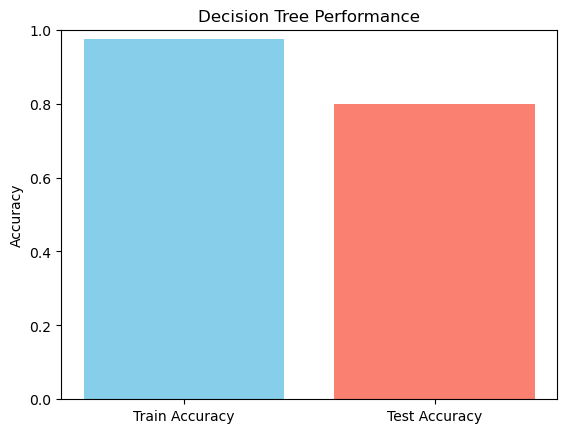

In [95]:
# Plots a bar chart comparing the training and testing accuracy of the Decision Tree model  
scores = [train_score, test_score]
labels = ['Train Accuracy', 'Test Accuracy']

# Plot
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylim(0, 1)  # accuracy ranges from 0 to 1
plt.title('Decision Tree Performance')
plt.ylabel('Accuracy')
plt.show()
